## Erroneous and missing data

We need to collect or download data prior to any data science or machine learning project. In an ideal scenario, the data will be collected at a high quality without any errors. However, in reality, no dataset is clean. All datasets have to be checked for erroneous and missing data before using the dataset. It is always important to do so as any analysis with wrong or missing data will not be accurate!

Remember that you should import any required modules at the start of a notebook. You can do it in the cell below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Erroneous data

Erroneous data refer to data that is either collected wrongly or input wrongly in the dataset. For example, if we have a dataset containing number of rooms in a house, we expect all the values to be positive as it is not possible to have negative number of rooms. Thus, all negative values within the dataset will be erroneous.

While it may be easy in some cases to identify erroneous data, it may not be the case all the time. Using the same idea of the dataset containing number of rooms in a house, it may also be possible that large values may also be erroneous. However, it is now not so clear whether large numbers are errors or outliers. This is because very large houses such as mansions can have many rooms. As mansions are rare, their data points will show up as outliers. Outliers are not erroneous data! Outliers are just rare cases and are still valid data points.

The example below will show you the difference between erroneous data and outliers.

## 1.1 Price of Computer games

We are given the task to study whether the price of a computer game is related to the number of people who likes the game. This will help a game development company adjust its price for its newest game. Assuming we have collected all the data on the prices in US Dollar (USD) and also the number of people who liked the game, we now need to check if the data contain any outliers or erroneous data. Run the code below and observe the output. 

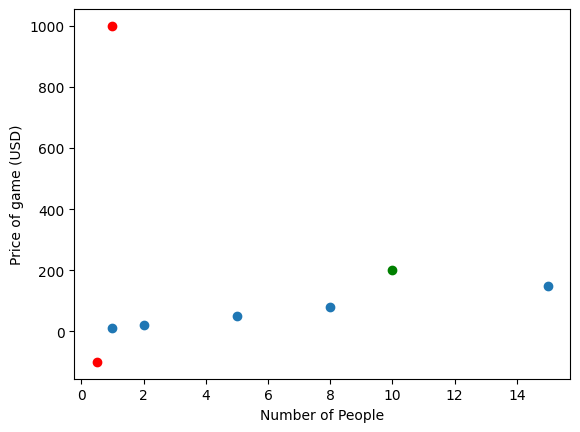

In [2]:
#game_name refers to the name of the games
#game_price refers to the price of the computer game and num_people refer to the number of people who liked a game
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','League of failures','Fritnite','Fatty Trotter']
game_price = [10,20,50,150,80,200,1000,-100]
num_people = [1,2,5,15,8,10,1,0.5]

plt.scatter(num_people[0:5],game_price[0:5])
plt.scatter(num_people[5],game_price[5],c='g')
plt.scatter(num_people[6:8],game_price[6:8],c='r')

plt.xlabel('Number of People')
plt.ylabel('Price of game (USD)')

plt.show();

What do you notice about the figure above? 

It seems that the points in red are erroneous data. For the first point in red, it is erroneous because the price is negative and the number of people who liked the game is between 0 and 1. It is not possible for a game to be sold at a negative price and it is also not possible to have a fraction of a person liking the game. The number of people should be a whole number. For the second point in red, it is erroneous because computer games do not cost as much as 1000 USD.

As the red data points are erroneous, we will need to remove these values from the dataset. Copy the code above and edit it to remove the erroneous points and only plot the remaining points. Run the edited code below. If you have done this correctly, you would have no negative value for the ‘price’, and no fraction for the ‘number of people’.

<font color=blue>Bonus: Can you name the games that are erroneous?</font>

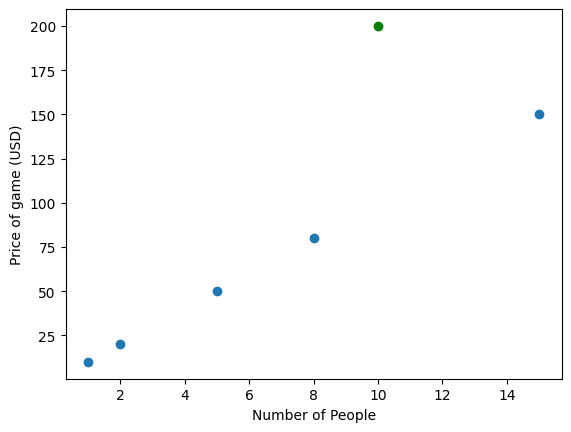

In [3]:
#game_name refers to the name of the games
#game_price refers to the price of the computer game and num_people refer to the number of people who liked a game
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','League of failures','Fritnite','Fatty Trotter']
game_price = [10,20,50,150,80,200,1000,-100]
num_people = [1,2,5,15,8,10,1,0.5]

plt.scatter(num_people[0:5],game_price[0:5])
plt.scatter(num_people[5],game_price[5],c='g')

plt.xlabel('Number of People')
plt.ylabel('Price of game (USD)')

plt.show();

We now see that there seems to be a linear relationship between the price of the game and the number of people who liked the game. The price of the game is higher when more people liked the game.

However, do you notice a point that does not seem to fit into the relationship?

You are right if you realised that the green point does not fit. As the game price and the number of people who liked the game seem to be realistic, it is likely to be an outlier instead of an erroneous data. To recall, an outlier may not be a wrong data point. In this case, it could just be a very expensive game that only has 12 people liking it.

We can choose to remove the outlier or we can keep the outlier. If you have sufficient data points or can collect more points to replace the outlier, we can remove the outlier from the dataset. There is no strict rule to decide if outliers should be removed. However, if the outliers make up the majority of your dataset, then you should not be removing them but instead try to collect more data to see if they are really outliers. In this example, as there only seems to be one outlier, we will remove the outlier. Remove the outlier and plot the new scatter plot below.

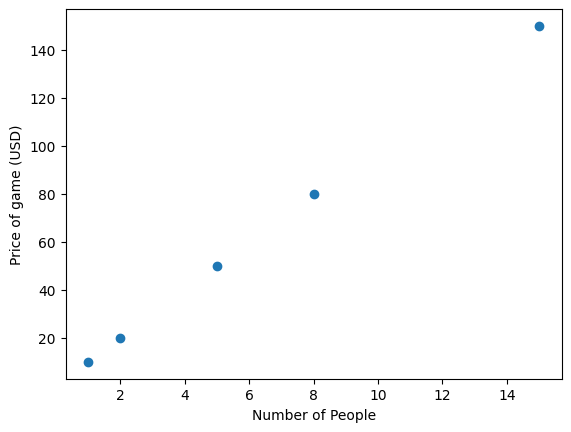

In [4]:
#game_name refers to the name of the games
#game_price refers to the price of the computer game and num_people refer to the number of people who liked a game
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','League of failures','Fritnite','Fatty Trotter']
game_price = [10,20,50,150,80,200,1000,-100]
num_people = [1,2,5,15,8,10,1,0.5]

plt.scatter(num_people[0:5],game_price[0:5])

plt.xlabel('Number of People')
plt.ylabel('Price of game (USD)')

plt.show();

We can observe from the new scatter plot that the price of game now shares a linear, increasing relationship with the number of people who liked the game.

## 1.2 Handling erroneous data in dataframes

You are given a CSV file "Students_Score1.csv". It contains data on the number of hours a student spent studying and the students' exam scores for Mathematics, English and Science. It is assumed that a student should score better when they spend more time studying. However, research has also shown that the a student is not able to study more than 16 hours a day. Additionally, it is also possible that some of the data would be erroneous. If an error is identified in the data, the whole row of data should be removed. Would you be able to help identify and remove the erroneous data?

First, load in the data as a dataframe df.

In [7]:
df_path = 'data/Students_Score1.csv'
df = pd.read_csv(df_path)

Print out the headers and first 5 rows of df. Addtionally, print out the .info() of df. This will help us understand the column names and also check for missing values.

In [8]:
df.head(5)

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
0,1,11,44,39.6,35.2
1,2,19,76,68.4,60.8
2,3,4,16,14.4,12.8
3,4,24,96,86.4,76.8
4,5,4,16,14.4,12.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    267 non-null    int64  
 1   Hours spent studying in a day  267 non-null    int64  
 2   Mathematics score              267 non-null    int64  
 3   English score                  267 non-null    float64
 4   Science score                  267 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 10.6 KB


We now know the name of the columns. We need to know the minimum and maximum values for the number of hours and scores in order to check for erroneous data. Print .describe() to find out these details.

In [10]:
df.describe()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,134.000000,12.123596,48.749064,43.539326,38.795506
std,77.220464,7.668636,31.802503,28.521820,24.539635
min,1.000000,-10.000000,-40.000000,-36.000000,-32.000000
25%,67.500000,6.000000,24.000000,21.600000,19.200000
50%,134.000000,12.000000,48.000000,43.200000,38.400000
75%,200.500000,18.000000,74.000000,66.600000,57.600000
max,267.000000,40.000000,175.000000,144.000000,128.000000


From the minimum and maximum values shown above, are you able to identify which columns have erroneous data?

In [11]:
# Hours spent studying in a day
# Mathematics score
# English score
# Scinece score

# There should not be negative values

Now let us try to remove the errorneous data. We will first work on the Mathematics score. The code should be able to remove rows with Mathematics score that are lesser than 0 or more than 100. 

In [33]:
df_C1 = df[~((df["Mathematics score"] < 0) | (df["Mathematics score"] > 100))]
df_C1.describe()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,135.578544,12.160920,48.337165,43.671264,38.914943
std,77.120975,7.442405,29.021102,27.756135,23.815696
min,1.000000,0.000000,0.000000,-15.000000,0.000000
25%,70.000000,6.000000,24.000000,21.600000,19.200000
50%,137.000000,12.000000,48.000000,43.200000,38.400000
75%,202.000000,18.000000,72.000000,64.800000,57.600000
max,267.000000,40.000000,96.000000,144.000000,128.000000


Compare the information on ‘Mathematics score’ before and after the data less than 0 and more than 100 is removed. What do you notice?

In [34]:
# Representative

If we compare the printout with the same table printed earlier, we can see that the Mathematics score now ranges from 0 to 96. Additionally, we can also see from .info() that the number of data points have reduced from 267 to 261. This indicates that there were 6 points that were errorneous in the Mathematics score.

It is now your turn to remove the erroneous data from the English score, Science score and Hours spent studying in a day columns. Print out the last .describe() and .info(). 

In [41]:
df_C2 = df_C1[~((df_C1['English score'] < 0) | (df_C1['English score'] > 100) | (df_C1['Science score'] < 0) | (df_C1['Science score'] > 100) | (df['Hours spent studying in a day'] < 0))]

/opt/anaconda3/envs/ITE/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


From the information you have obtained from .describe (), can you identify the total number of data points that had erroneous data? Can you also identify the correct minimum and maximum scores for each subject?

In [43]:
df_C2.describe()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,257.000000,257.000000,257.000000,257.000000,257.000000
mean,135.038911,12.050584,48.202335,43.382101,38.561868
std,76.669685,7.292532,29.170129,26.253116,23.336103
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,6.000000,24.000000,21.600000,19.200000
50%,137.000000,12.000000,48.000000,43.200000,38.400000
75%,201.000000,18.000000,72.000000,64.800000,57.600000
max,266.000000,24.000000,96.000000,86.400000,76.800000


## 2. Missing data

Missing data refer to gaps within the dataset. This is becasue not every data point can be collected. For example, if you are required to count the number of letters delivered by a postman each day, you may have no data on the days which the postman was on leave. Thus, you will fill in data on those days as missing data. Another possible reason for missing data could be due to carelessness of the person collecting the data. Sometimes, the person collecting the data may have forgotten to input the data into the dataset. Additionally, if you are obtaining data from survey forms, you can expect to encounter missing data due to incomplete forms. This is because not everyone will fill in all the fields within the survey form

Are you able to provide some possible reasons why there may be missing data in the scenarios listed below?
- Number of hours a teacher will spend in school a day
- Number of phone calls an office worker receives on the mobile phone in a day
- Air temperature of your city

In [44]:
# Teacher might not be in school everyday
# Human error
# Human error

Missing data can have many different forms. Usually, we will refer to missing data as NaN but some datasets will use either very large numbers or very small numbers to represent missing data. One example will be that of meteorological or weather data. The value of -9999 is used to represent missing data values in these datasets.

It is important to remove or replace these missing data values in a dataset before conducting any analysis. This is to ensure accuracy in our analysis.

In the example below, you will learn how to identify and treat these missing values.

## 2.1 House prices

You and your friend, Ben, have been tasked to determine if house prices within your neighbourhood is related to the number of rooms within the house. Being a nice friend, Ben decides to collect all the data for you. However, Ben may have been careless and missed some data points. Are you able to help him identify if there are any missing data?

The data is given below. House_prices refer to the price of the house in US Dollar (USD) and the Num_rooms refer to the number of rooms in the house. Run the code and observe the output carefully! Make sure you have imported numpy as np before running the code.

In [46]:
import numpy as np

In [117]:
House_prices = [10050,42300,50206,np.nan,105000,np.nan,22350]
Num_rooms = [np.nan,4,5,6,10,12,2]

print('Total number of data points in House_prices = ',np.count_nonzero(~np.isnan(House_prices)))
print('Total number of data points in Num_rooms = ',np.count_nonzero(~np.isnan(Num_rooms)))

Total number of data points in House_prices =  5
Total number of data points in Num_rooms =  6


Why are the number of data points in House_prices different from the number of data points in Num_rooms? How many houses are there in total?

In [118]:
# There are 7 houses

Remove the missing data from the dataset and plot the scatter plot below. Label the axis accordingly. Remember to also remove the corresponding data for each missing value. For example, if there is a missing value in house price, the corresponding value for number of rooms should also be removed. What do you observe from the scatter plot? Write down your observations.

In [119]:
for i in range(len(House_prices)):
    print(i)

0
1
2
3
4
5
6


In [120]:
for i in range(len(Num_rooms)):
    print(i)

0
1
2
3
4
5
6


In [146]:
P = [10050,42300,50206,0,105000,0,22350]
NR = [0,4,5,6,10,12,2]

In [147]:
Lst = list(zip(P, NR))
Lst

[(10050, 0), (42300, 4), (50206, 5), (0, 6), (105000, 10), (0, 12), (22350, 2)]

In [148]:
for pair in Lst:
    if pair[0] == 0:
        Lst.remove(pair)
    if pair[1] == 0:
        Lst.remove(pair)
        
print(Lst)

[(42300, 4), (50206, 5), (105000, 10), (22350, 2)]


<font color=blue>Bonus: Can you guess the correct values of the previous missing values? Replace the missing values with your guesses and plot the scatter plot again!</font>

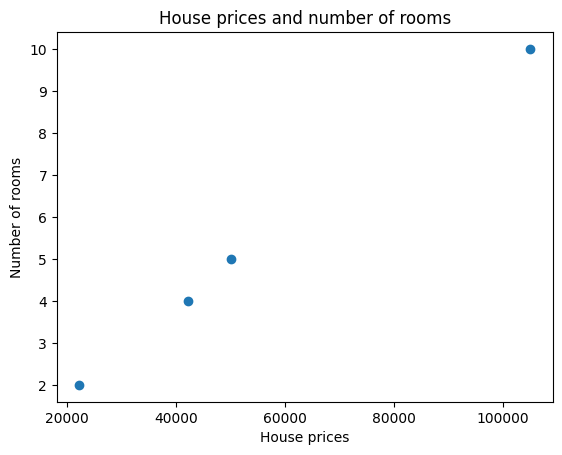

In [154]:
#your code here
import matplotlib.pyplot as plt

def dup(list):
    HP = []
    NR = []

    for pair in Lst:
        HP.append(pair[0])
        NR.append(pair[1])
    
    plt.scatter(HP, NR)
    plt.title('House prices and number of rooms')
    plt.ylabel('Number of rooms')
    plt.xlabel('House prices')
    plt.show()
        
    
dup(Lst)

## 2.2 Handling missing values in dataframes

You are again asked to handle data that contains students' exam results and their studying hours. The data is stored in the "Students_Score2.csv" file. Not all the students reported their studying hours and thus, there are missing values in the data. Remove the missing values and report the total number of students that have missing data.

First, load in the data as a dataframe df.

In [179]:
SS2_Path = "data/Students_Score2.csv"
df_SS2 = pd.read_csv(SS2_Path)

Print out the headers and first 5 rows of df. Addtionally, print out the .info() of df.

In [180]:
df_SS2.head(5)

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
0,1,0.0,0.0,0.0,0.0
1,2,3.0,15.0,12.9,12.6
2,3,2.0,10.0,8.6,8.4
3,4,13.0,65.0,55.9,54.6
4,5,0.0,0.0,0.0,0.0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    267 non-null    int64  
 1   Hours spent studying in a day  267 non-null    int64  
 2   Mathematics score              267 non-null    int64  
 3   English score                  267 non-null    float64
 4   Science score                  267 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 20.6 KB


From the .info() output, did you observe the differing number of rows for each column? The different number of rows are due to the presence of missing numbers in them.

Before we are able to handle the missing values, we need to first check for erroneous data. Print out .describe() and observe the minimum and maximum values.

In [182]:
df_SS2.describe()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,387.000000,382.000000,383.000000,382.000000,383.000000
mean,194.000000,7.083770,35.417755,30.392670,29.641253
std,111.861522,4.473697,22.271713,19.258215,18.783876
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,97.500000,3.000000,15.000000,12.900000,12.600000
50%,194.000000,7.000000,35.000000,30.100000,29.400000
75%,290.500000,11.000000,55.000000,47.300000,46.200000
max,387.000000,15.000000,75.000000,64.500000,63.000000


We now see that the number of hours spent studying is wihin 0 and 15 and all the scores are also between 0 and 100. This shows that there are no errors within the dataset.

Now, lets remove the missing values from the dataset. Pandas has a nice trick to allow us to do it easily. It is called .dropna(). You can use it to drop missing values by row or column. For example, if you want to remove the rows that have missing values, you can call df.dropna(axis=0). If you want to remove the columns that have missing values, you can call df.dropna(axis=1). You can find out more information on .dropna() [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html).

In the case of the students scores, should we remove the missing values by rows or by columns?

In [183]:
# rows

Now, write the code that will allow you to remove the missing values below. You can refer to this [link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) for information on how to use .dropna() to remove missing values. Remember to assign the output to a new dataframe so that you do not edit the original dataframe. You can use df2 = df.(your function here) to assign to a new dataframe.

In [184]:
df_SS2_C1 = df_SS2.dropna(axis=0).copy()

Print out the .info() for the new dataframe and observe the number of non-null values for each column.

In [185]:
df_SS2_C1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    373 non-null    int64  
 1   Hours spent studying in a day  373 non-null    float64
 2   Mathematics score              373 non-null    float64
 3   English score                  373 non-null    float64
 4   Science score                  373 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 17.5 KB


Do you see that the number of rows are now the same for all columns? How many students had missing values?

In [192]:
# 373 - 267 = 106 students 
#print(373 - 267)

<font color=Blue>Bonus: While it is easy to remove missing values, we sometimes do not do so as the dataset is very small. Removing the values will lead to a smaller dataset. As such, we can also fill in the missing values with other values instead. We can choose to fill in the missing values either with the average values or the most frequent values. For example, if the Mathematics score value is missing, we can find the average value of all the students' mathematics score and fill in the missing value with that value. Try out the code below and observe the output!</font>

In [ ]:
#The .copy allows the copying of the whole dataframe to prevent changing the orginal dataframe
#your code here

You should now see that the missing values for Mathematics score have been filled in and there are now 387 non-null values instead of 383 non-null values shown earlier. Now, try to fill in the missing values for the rest of the columns with their respective averages.

In [193]:
df_SS2_C2 = df_SS2.copy()

In [194]:
df_SS2_C2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    387 non-null    int64  
 1   Hours spent studying in a day  382 non-null    float64
 2   Mathematics score              383 non-null    float64
 3   English score                  382 non-null    float64
 4   Science score                  383 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.2 KB


In [195]:
df_SS2_C2['Mathematics score'].fillna(df_SS2_C2['Mathematics score'].mean(), inplace=True)

In [197]:
def fill_col_average(df):
    to_fill = [
        'Hours spent studying in a day',
        'Mathematics score',
        'English score',
        'Science score'
    ]
    for i in to_fill:
        df[i].fillna(df[i].mean(), inplace=True)
    return df

In [198]:
Results = fill_col_average(df_SS2_C2)
Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    387 non-null    int64  
 1   Hours spent studying in a day  387 non-null    float64
 2   Mathematics score              387 non-null    float64
 3   English score                  387 non-null    float64
 4   Science score                  387 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.2 KB
